In [235]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import json
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc 
font_path = "./malgun.ttf" #폰트 파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font",family=font_name)

In [2]:
df = pd.read_excel("시도별 전출입 인구수.xlsx",fillna=0,header=0)
# na는 0으로 채움

df=df.fillna(method="ffill")# 누락값을 앞 데이터로 채움

mask = (df["전출지별"]=="서울특별시")&(df["전입지별"]!="서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop("전출지별",axis=1)
df_seoul.rename({"전입지별":"전입지"},axis=1,inplace=True)
df_seoul.set_index("전입지",inplace=True) # 인덱스의 인덱스

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc["경기도"]

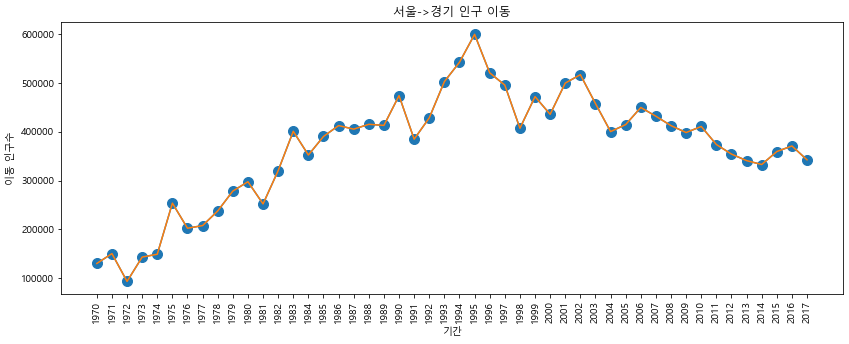

In [3]:
# x,y축으 나눠서 입력해서 그래프를 그리거나
plt.figure(figsize = (14,5)) # 그래프 사이즈 지정
plt.xticks(size=10, rotation="vertical") # x축 눈금 라벨을 반시계 방향으로 90 회전

# 스타일 서식 지정
#plt.style.use("ggplot")
#(‘classic’,’bmh’, ’dark_background’,   ’f ast’, ’grayscale’,’seaborn’ 등)



plt.plot(sr_one.index,sr_one.values, marker="o", markersize=10)
# 시리즈를 바로 plot 함수에 입력
plt.plot(sr_one)
plt.title("서울->경기 인구 이동")
plt.xlabel("기간")
plt.ylabel("이동 인구수")
plt.show()

In [13]:
plt.annotate("텍스트",
             xy=(20,620),#화살표 머리(끝점)
             xytext=(22,290),#화살표 꼬리부분(시작점)
             rotation=25,#텍스트 회전각도
             va="baseline",#텍스트 상하 정렬
             ha="center", # 텍스트 좌우 정렬
             fontsize=15, #텍스트 크기
             xycoords="data",#좌표체계
            arrowprops=dict(arrowstyle="->",color="skyblue",lw=5),#화살표 서식
            )

Text(22, 290, '텍스트')

ValueError: Image size of 7424x134835 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

## 여러개의 그래프 생성

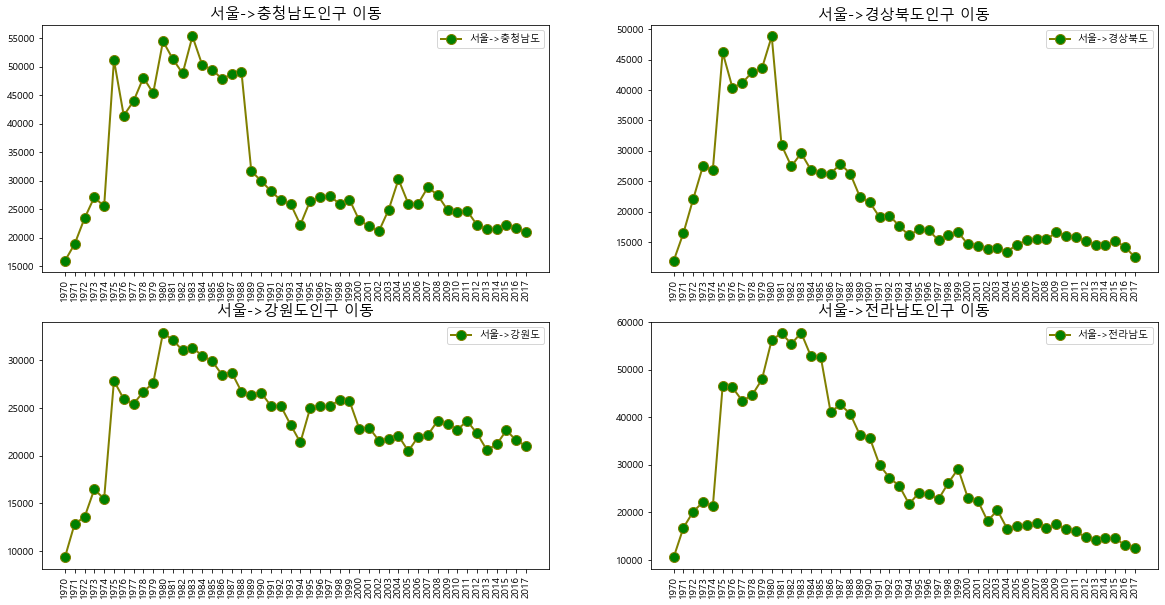

In [27]:
col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[["충청남도","경상북도","강원도","전라남도"],col_years]

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig= plt.figure(figsize=(20,10))
for idx,i in enumerate(["충청남도","경상북도","강원도","전라남도"]):
    plt.subplot(2,2,idx+1)
    plt.plot(col_years,df_4.loc[i,:],marker="o",markerfacecolor="green",
            markersize=10, color="olive",linewidth=2,label=f"서울->{i}")
    plt.title("서울->{}인구 이동".format(i),size=15)
    plt.xticks(size=10,rotation="vertical")
    plt.legend(loc="best")



## 한 화면에 여러 그래프 겹치기

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earl

Text(0, 0.5, '지역')

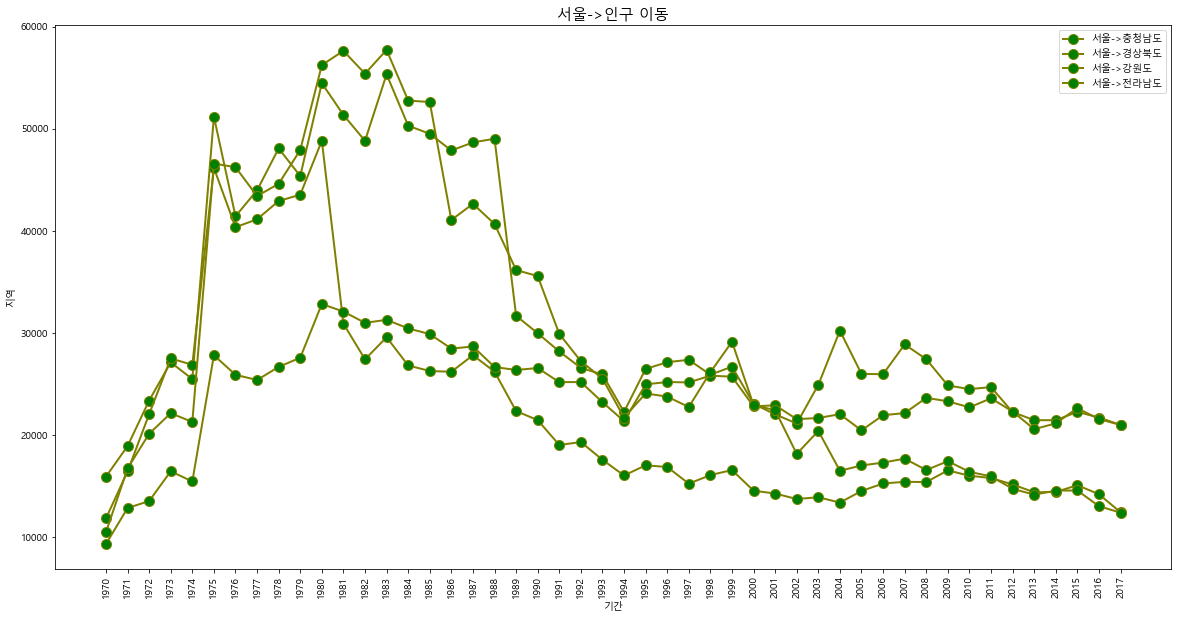

In [30]:
col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[["충청남도","경상북도","강원도","전라남도"],col_years]

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig= plt.figure(figsize=(20,10))
for idx,i in enumerate(["충청남도","경상북도","강원도","전라남도"]):
    plt.subplot(1,1,1)
    plt.plot(col_years,df_4.loc[i,:],marker="o",markerfacecolor="green",
            markersize=10, color="olive",linewidth=2,label=f"서울->{i}")
plt.title("서울->인구 이동".format(i),size=15)
plt.xticks(size=10,rotation="vertical")
plt.legend(loc="best")
plt.xlabel("기간")
plt.ylabel("지역")

## 면적 그래프


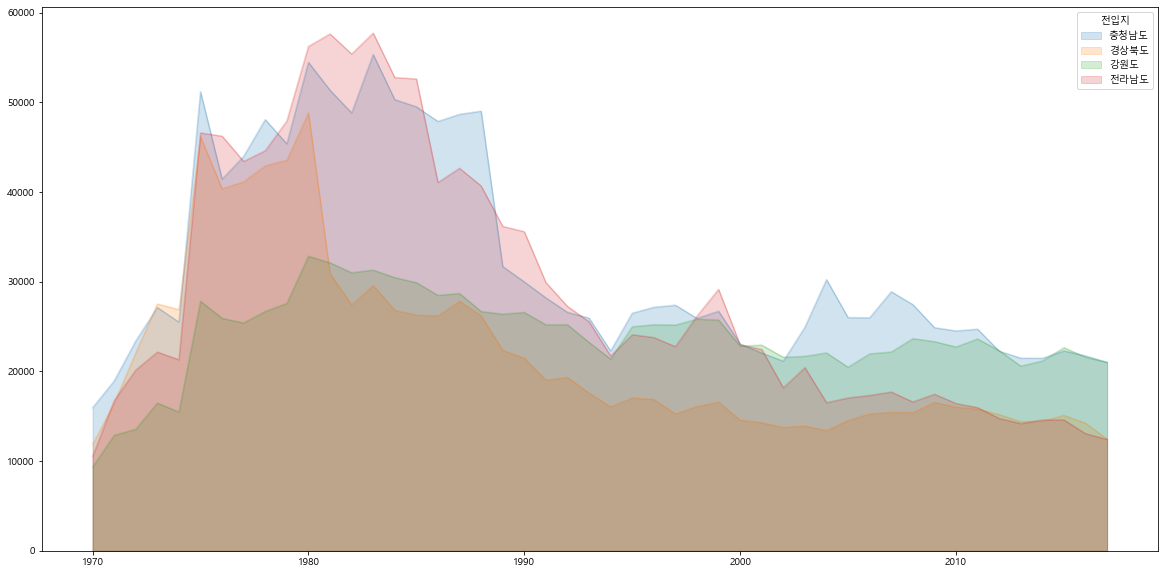

In [32]:
col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[["충청남도","경상북도","강원도","전라남도"],col_years]
df_4 = df_4.transpose()
# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
df_4.index = df_4.index.map(int) #데이터프레임의 인덱스 정수형으로 변경

# 면적 그래프 그리기
df_4.plot(kind="area",stacked=False,alpha=0.2,figsize=(20,10))

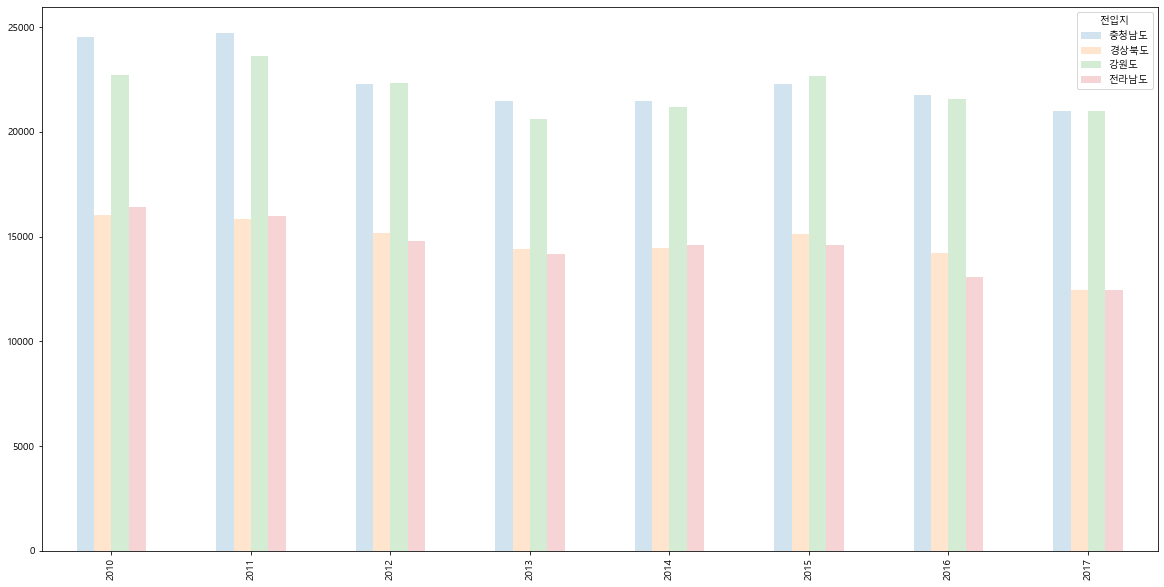

In [38]:
col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[["충청남도","경상북도","강원도","전라남도"],col_years]
df_4 = df_4.transpose()
# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
df_4.index = df_4.index.map(int) #데이터프레임의 인덱스 정수형으로 변경

# 면적 그래프 그리기
df_4.plot(kind="area",stacked=False,alpha=0.2,figsize=(20,10))

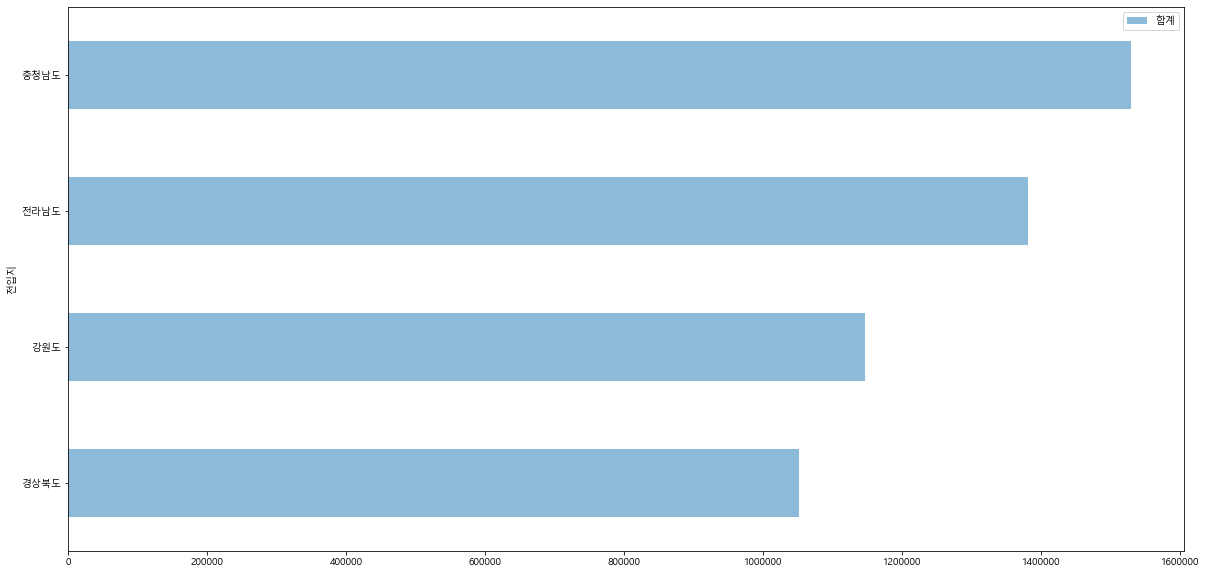

In [44]:
col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[["충청남도","경상북도","강원도","전라남도"],col_years]

# 2010~2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4["합계"]=df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[["합계"]].sort_values(by="합계",ascending=True)

# 면적 그래프 그리기
df_total.plot(kind="barh",stacked=False,alpha=0.5,figsize=(20,10))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


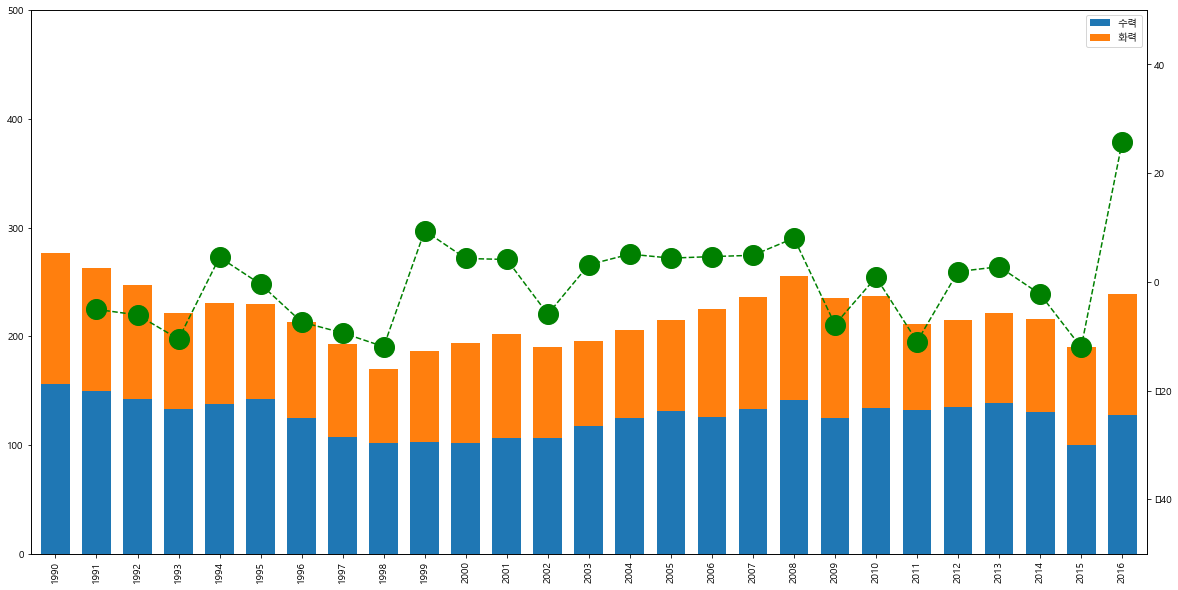

In [69]:
df=pd.read_excel("./남북한발전전력량.xlsx",convert_float=True)
df=df.loc[5:9]
df.drop("전력량 (억㎾h)",axis=1, inplace=True)
df.set_index("발전 전력별", inplace=True)
df= df.T

# 증감율(변동률) 계산
df.rename(columns = {"합계":"총발전량"},inplace=True)
df["총발전량-1년"]=df["총발전량"].shift(1) # 총발전량 칼럼이 1행씩 이동해서
# 새로운 열 생성
df["증감율"] = ((df["총발전량"]/df["총발전량-1년"])-1)*100

# 2축 그래프 그리기
ax1 = df[["수력","화력"]].plot(kind="bar",figsize=(20,10),width=0.7,stacked=True)

ax2=ax1.twinx() # y축을 두개로 만들엇음
ax2.plot(df.index, df.증감율, ls="--",marker="o",markersize=20,
        color="green",label="전년대비 증감율(%)")

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.legend()

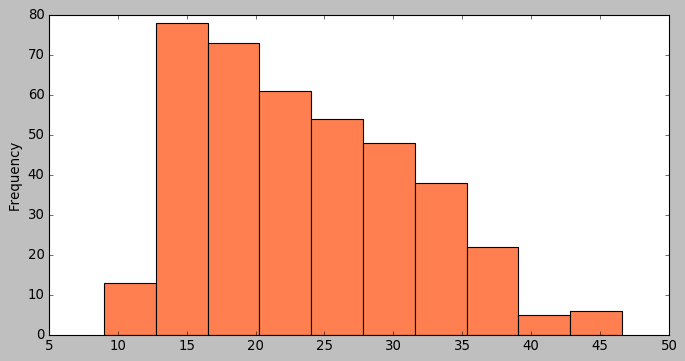

In [73]:
df=pd.read_csv("./auto-mpg.csv",header=None)
plt.style.use("classic")
#열 이름
df[0].plot(kind="hist",bins=10,color="coral",figsize=(10,5))

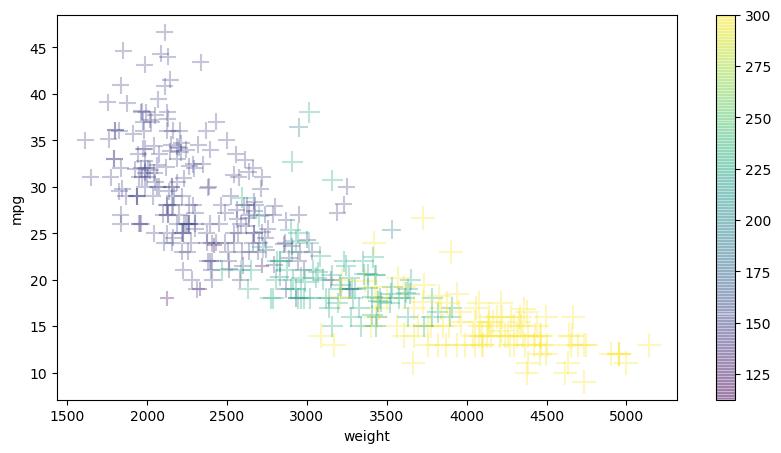

In [94]:
cylinder_size = df[1]/df[1].max()*300
color = df[1]
plt.style.use("default")
df.plot(kind="scatter",x=4,y=0,s=cylinder_size,figsize=(10,5),alpha=0.3,
       cmap="viridis",c=cylinder_size,marker="+")
plt.xlabel("weight")
plt.ylabel("mpg")

plt.savefig("./scatter.png") # 그림 파일 저장
plt.savefig("./scatter_transparent.png", transparent = True) # 그림 배경을 투명하게

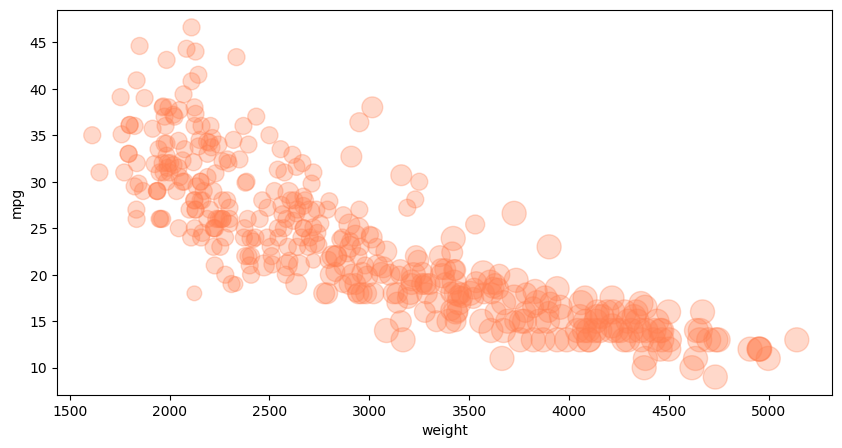

In [95]:
cylinder_size = df[1]/df[1].max()*300
color = df[1]
plt.style.use("default")
df.plot(kind="scatter",x=4,y=0,s=cylinder_size,figsize=(10,5),alpha=0.3,
       c="coral")
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()

        0     1        2         4       5      6  count
7                                                       
1  5000.8  1556  61229.5  837121.0  3743.4  18827    249
2  1952.4   291   7640.0  169631.0  1175.1   5307     70
3  2405.6   324   8114.0  175477.0  1277.6   6118     79


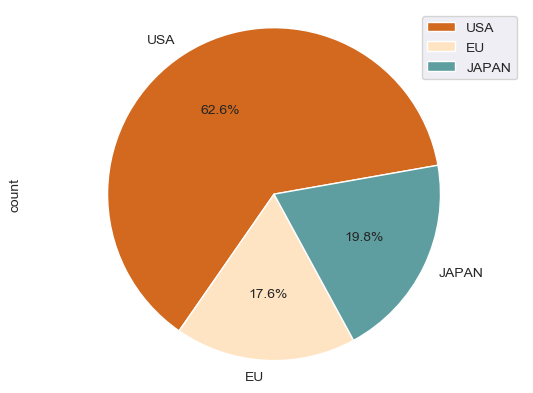

In [169]:
df["count"]=1
df_origin=df.groupby(7).sum()
print(df_origin.head())

df_origin.index=["USA","EU","JAPAN"]
df_origin["count"].plot(kind="pie",autopct="%1.1f%%", # 퍼센트 표시
                       startangle=10, colors=["chocolate","bisque","cadetblue"])

plt.axis("equal") # 파이 차이의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index)
plt.show()

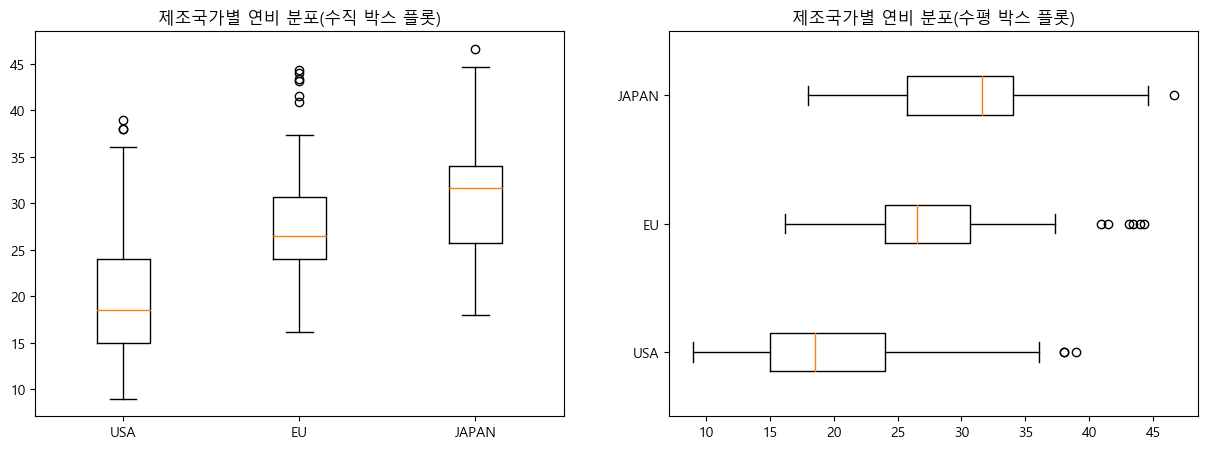

In [122]:
fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x=[df[df[7]==1][0],
              df[df[7]==2][0],
              df[df[7]==3][0]],
           labels=["USA","EU","JAPAN"])

ax2.boxplot(x=[df[df[7]==1][0],
              df[df[7]==2][0],
              df[df[7]==3][0]],
           labels=["USA","EU","JAPAN"],
           vert=False) # 수평 박스 플롯

ax1.set_title("제조국가별 연비 분포(수직 박스 플롯)")
ax2.set_title("제조국가별 연비 분포(수평 박스 플롯)")

plt.show()

In [125]:
import seaborn as sns
titanic = sns.load_dataset("titanic")

#print(titanic.head())
#print("\n")
#print(titanic.info())

#스타일 테마 설정
sns.set_style("whitegrid") # darkgrid, whitegrid, dart, white, ticks

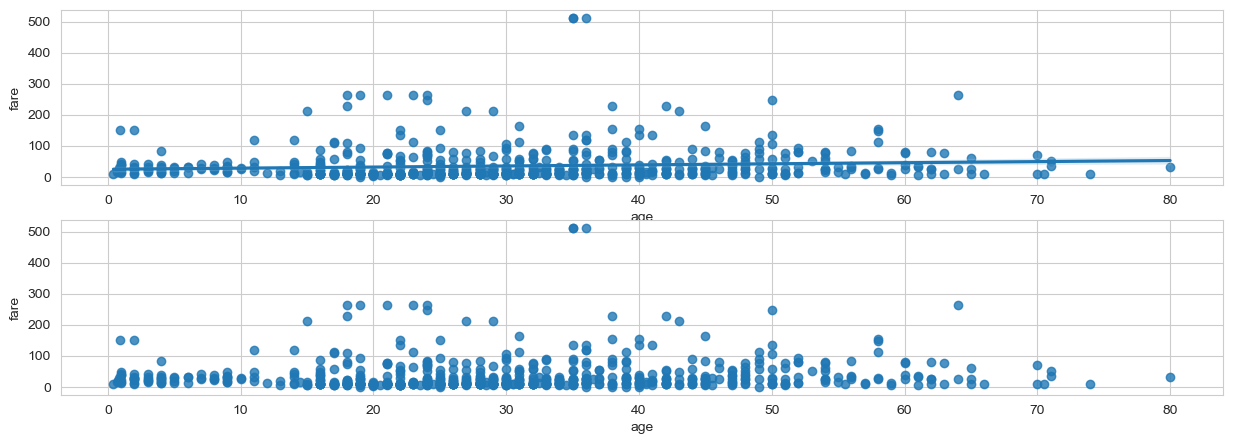

In [131]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.regplot(x="age",y="fare",data=titanic)
plt.subplot(2,1,2)
sns.regplot(x="age",y="fare",data=titanic,fit_reg=False) #선형 회귀식 미표시
plt.show()

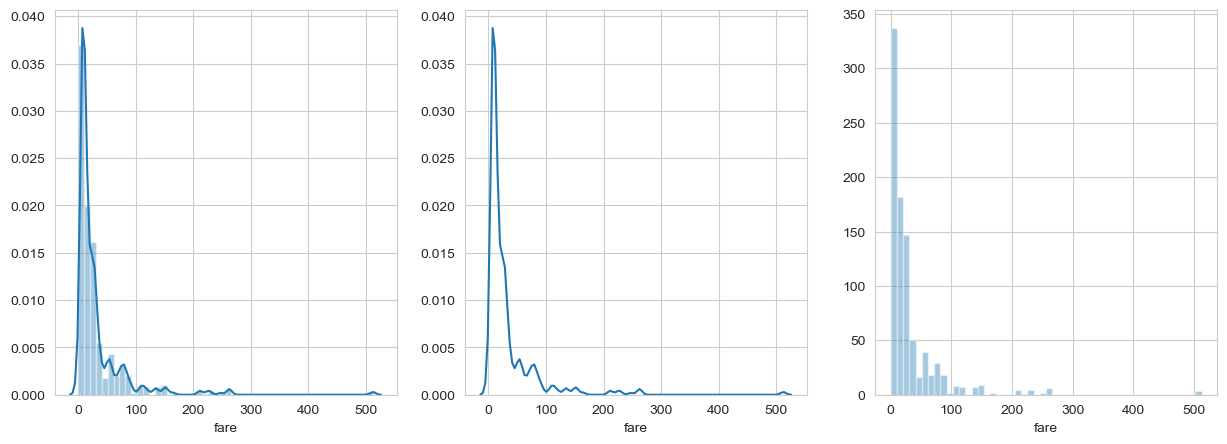

In [154]:
# 기본값
plt.figure(3,figsize=(15,5))
for i in range(1,4):
    plt.subplot(1,3,i)
    if i==1:
        sns.distplot(titanic["fare"])
    elif i==2:
        sns.distplot(titanic["fare"],hist=False) # 히스토그램이 표시되지 않음
    elif i==3:
        sns.distplot(titanic["fare"],kde=False) # 커널밀도 그래프가 표시되지 않음

## heatmap
annot = True/False : 데이터 값 표시 여부 3) fmd =‘d’ : 정수형 포맷 4) cmap =‘YlGnBu’ : 컬러 맵 5) linewidth = .5 : 구분선 굵기 6) cbar = True/False : 컬러 바 표시 여부

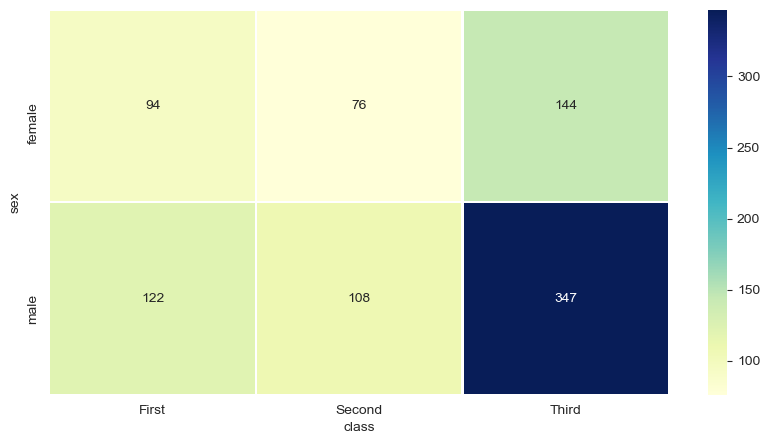

In [163]:
table=titanic.pivot_table(index=["sex"],columns="class",aggfunc="size")
# numpy 의 경우 다 같은 형식이기 때문에 하나로 통채로 계산하지만
# 데이터프레임에 대하여 어떤 연산을 취하게 되면 열별로 계산
plt.figure(figsize=(10,5))
sns.heatmap(table,annot=True,fmt="d",cmap="YlGnBu",
           linewidth=1,
           cbar=True)
plt.show()

## stripplot(), swarmplot()
: 범주형 변수에 들어 있는 각 범주별 데이터의 분포를 확인하는 방법 swarmplot()은 분산까지 고려하여, 데이터 포인트가 서로 중복되지 않도록 그림 -> 데이터가 퍼져있는 정도를 입체적으로 볼 수 있음 1) x축 변수 2) y축 변수 3)  데이터셋 - 데이터프레임 4) ax = axn : axe 객체 – n번째 그래프

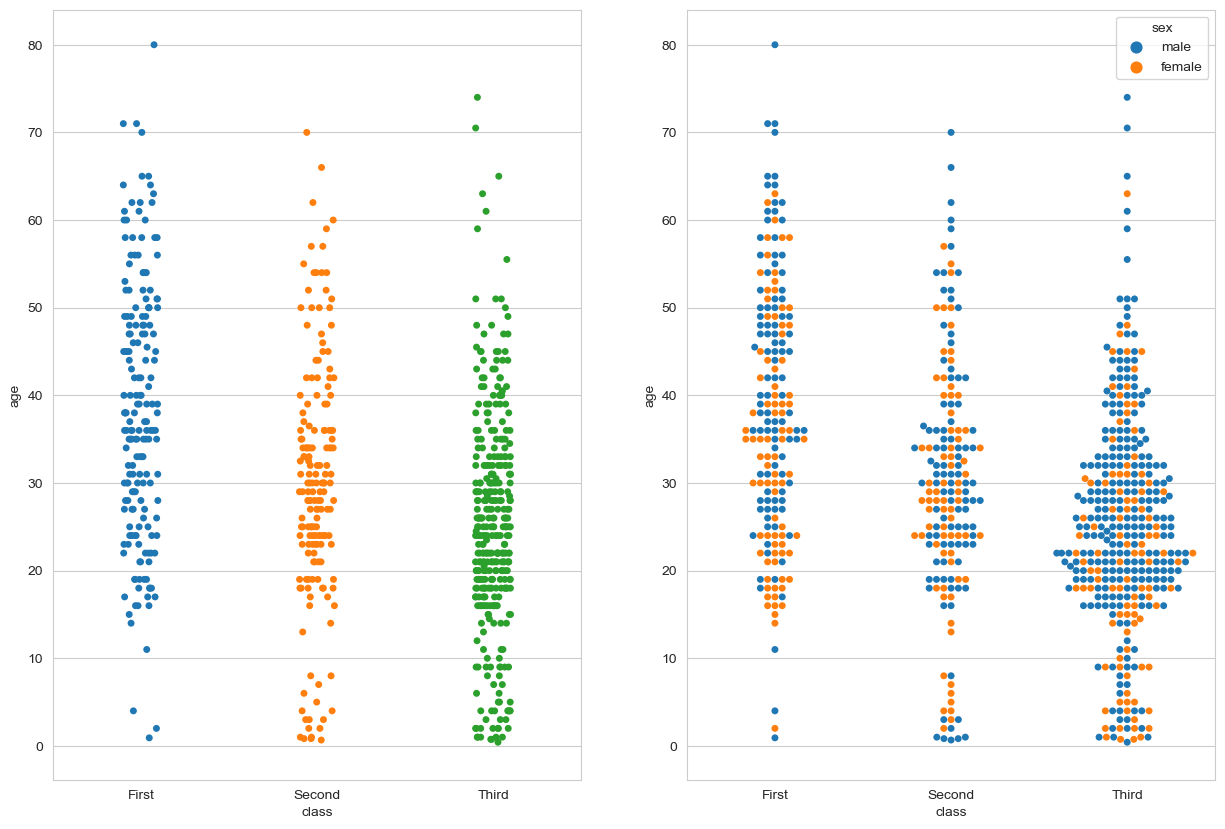

In [165]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
sns.stripplot(x="class",y="age",data=titanic,ax=ax1) # 데이터 분산 미고려
sns.swarmplot(x="class",y="age",data=titanic,ax=ax2,hue="sex")
plt.show()

## barplot()
1) x축 변수 2) y축 변수 3) 데이터 프레임 4) hue = ‘변수’ : 각 데이터를 특정 변수 기준으로 구분하여 표시 5)  dodge = False : 축 방향으로 분리하지 않고 누적 그래프 출력 6) ax = axn : axe 객체 – n번째 그래프


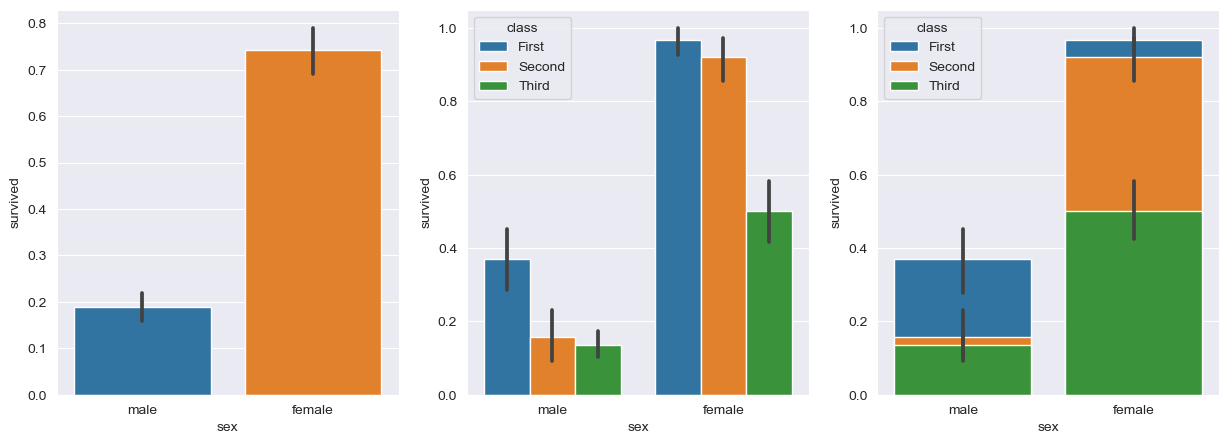

In [166]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
# x축, y축에 변수 할당
for i in range(1,4):
    plt.subplot(1,3,i)
    if i==1:
        sns.barplot(x="sex",y="survived",
           data=titanic)
    elif i==2:
        sns.barplot(x="sex",y="survived", hue="class",
            data=titanic)
    elif i==3:
        sns.barplot(x="sex",y="survived", hue="class",
                dodge=False,data=titanic )

## countplot()
각 범주에 속하는 데이터의 개수를 막대 그래프로 나타내는 함수
1) x축 변수 2) y축 변수 3)  데이터셋 – 데이터프레임 4) hue = ‘변수’ : 각 데이터를 특정 변수 기준으로 구분하여 표시 5)  palette: 색상 설정 6) dodge = False : 축 방향으로 분리하지 않고 누적 그래프 출력 7)  ax = axn : axe 객체 – n번째 그래프

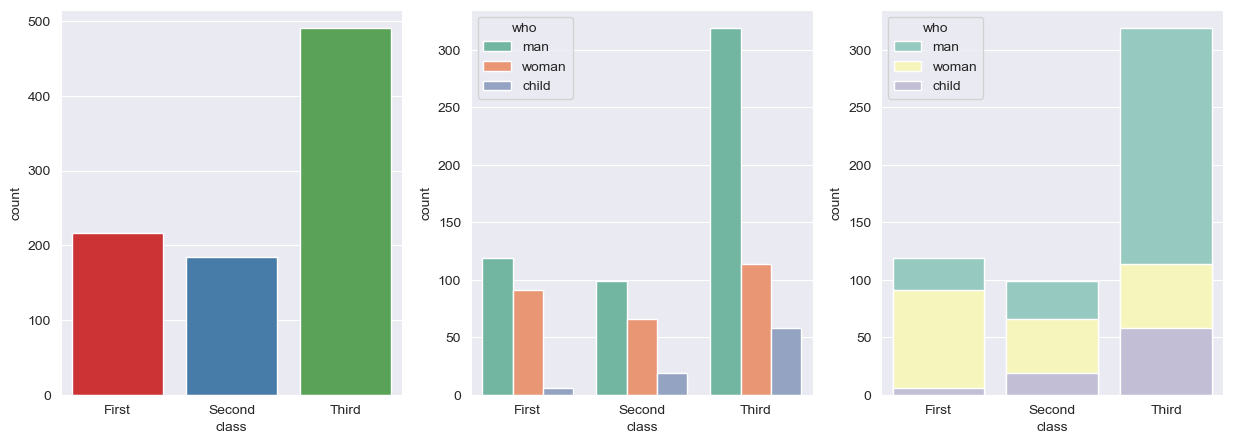

In [173]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
# 기본값
for i in range(1,4):
    plt.subplot(1,3,i)
    if i==1:
        sns.countplot(x="class",palette="Set1",
           data=titanic)
    elif i==2:
        sns.countplot(x="class",hue="who",palette="Set2",
           data=titanic)
    elif i==3:
        sns.countplot(x="class",hue="who",palette="Set3",dodge=False,
           data=titanic)

## boxplot(), viloinplot()

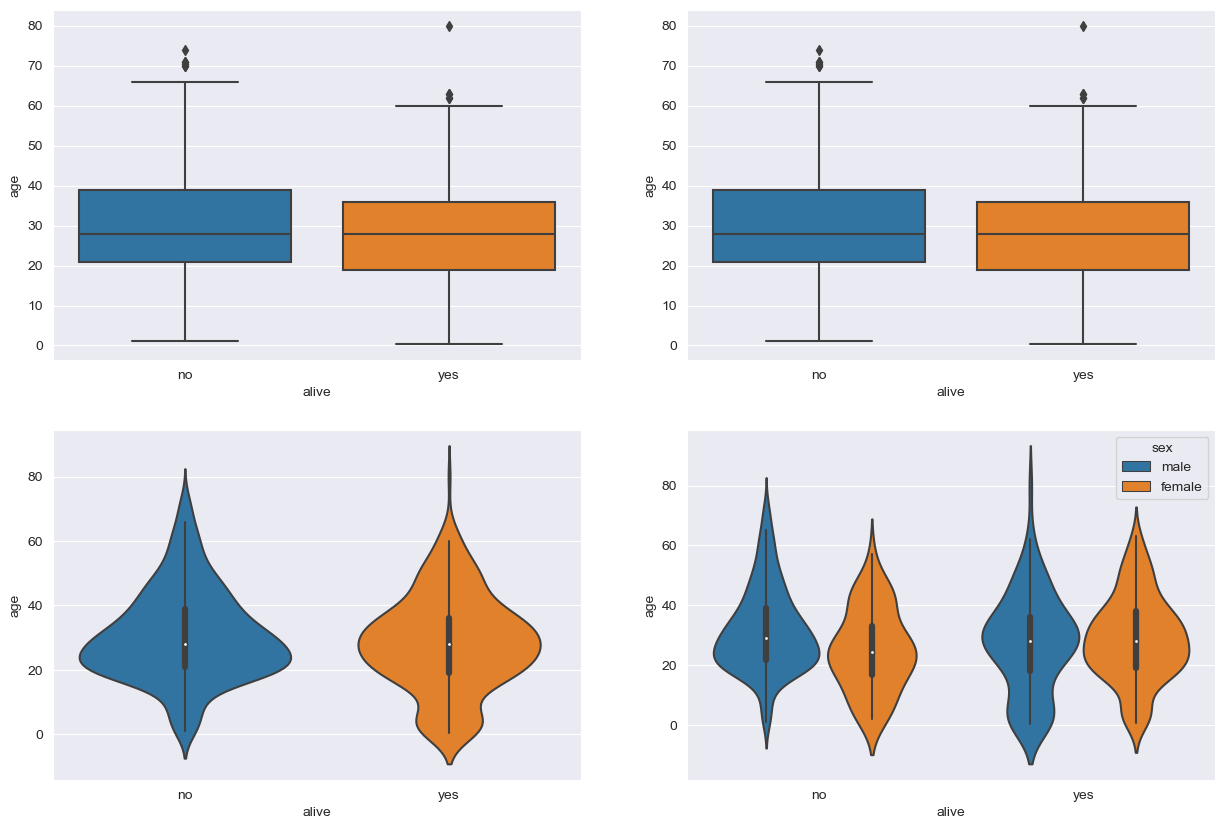

In [181]:
graph=['sns.boxplot(x="alive",y="age",data=titanic)',
'sns.boxplot(x="alive",y="age",data=titanic)',
'sns.violinplot(x="alive",y="age",data=titanic)',
'sns.violinplot(x="alive",y="age",hue="sex",data=titanic)']
plt.figure(figsize=(15,10))
for idx, i in enumerate(graph):
    plt.subplot(2,2,idx+1)
    eval(i)

## jointplot
산점도와 히스토그램을 동시에 보여줌  
kind = "hex" # 산점도에 회귀선 추가한 그래프  
kind = "hex" #육각 그래프  
kind = "kde" # 커널 밀집 그래프

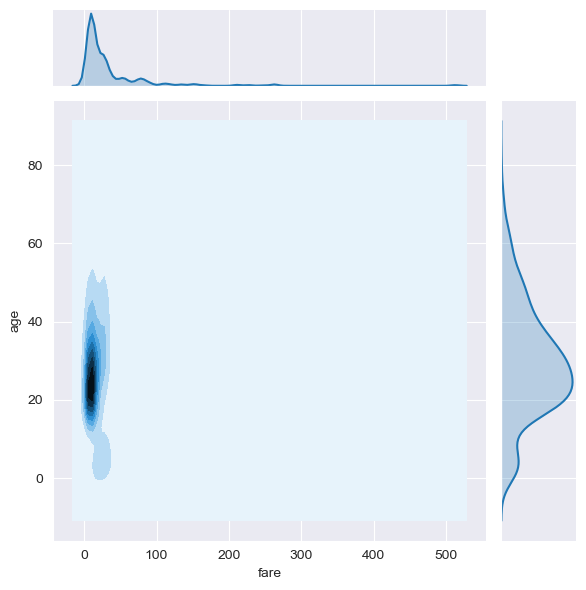

In [186]:
sns.jointplot(x="fare",y="age",kind="kde",data=titanic)

## FacetGrid()
seaborn.FacetGrid( data , row = None , col = None , hue = None,... )
1)  data = 데이터프레임 2) row = x축 변수 3)  col = y축 변수 4) hue = ‘변수’ : 각 데이터를 특정 변수 기준으로 구분하여 표시 5)  ax = axn : axe 객체 – n번째 그래프

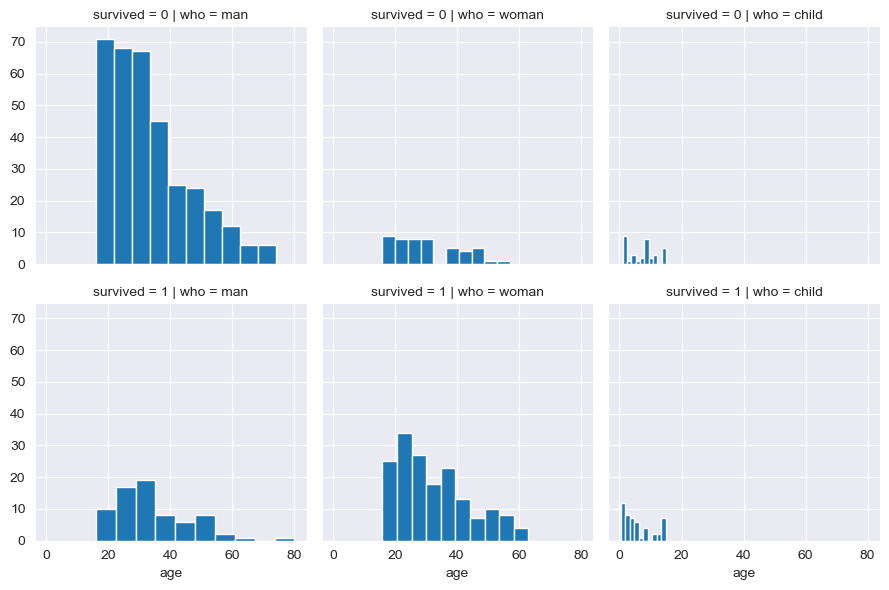

In [187]:
g=sns.FacetGrid(data=titanic,col="who",row="survived")
g=g.map(plt.hist,"age")

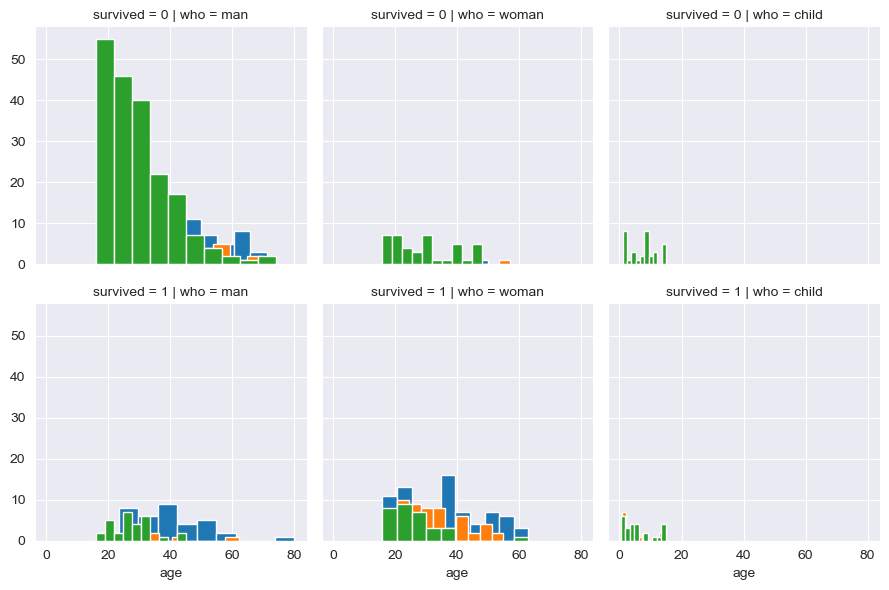

In [188]:
g=sns.FacetGrid(data=titanic,col="who",hue="class",row="survived")
g=g.map(plt.hist,"age")

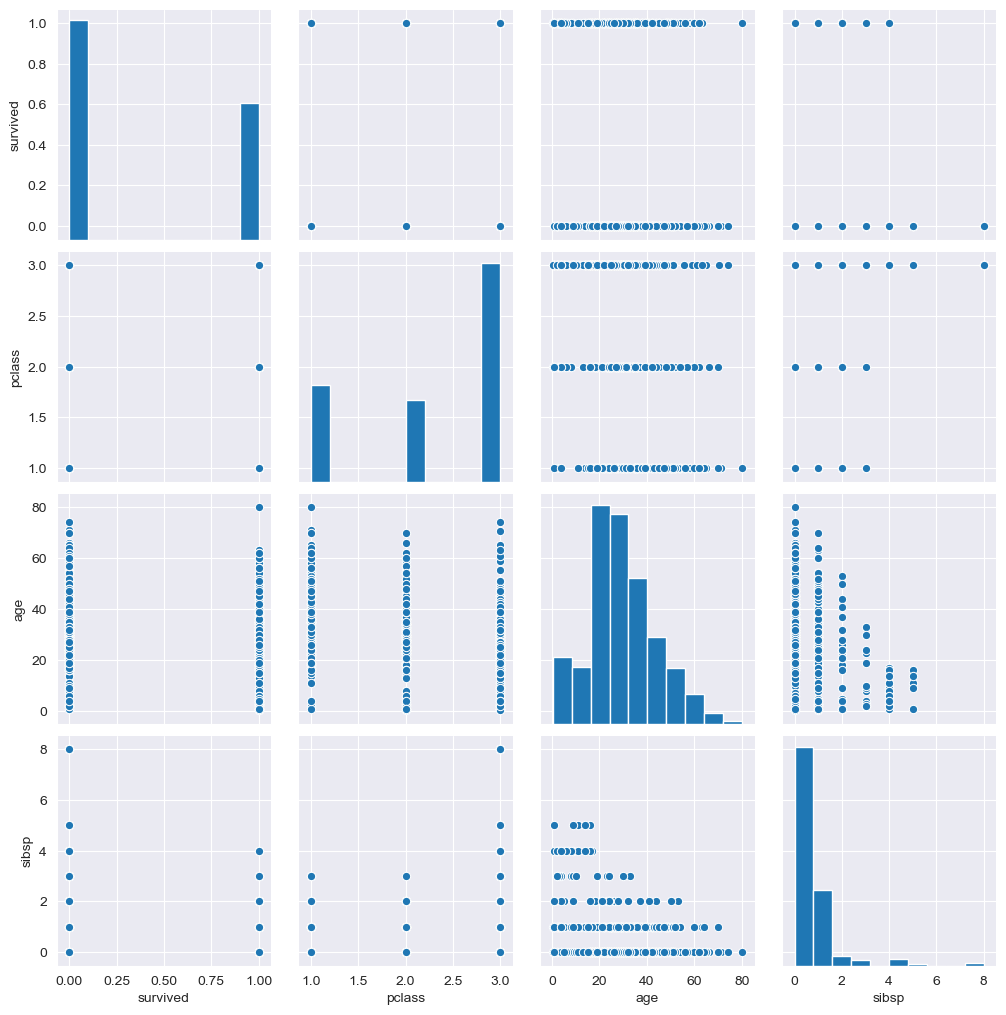

In [196]:
g=sns.pairplot(titanic.iloc[:,0:5])

In [198]:
import folium

In [233]:
# 서울 지도 만들기

#처음 위치 지정
seoul_map = folium.Map(location=[37.55,126.98],
                      zoom_start=12)

seoul_map2 = folium.Map(location=[37.55,126.98],
                       tiles="Stamen Terrain",
                       zoom_start=12)

seoul_map3 = folium.Map(location=[37.55,126.98],
                       tiles="Stamen Toner",
                       zoom_start=15)

g_map = folium.Map(location=[37.5502,126.982],
                       tiles="Stamen Terrain",
                       zoom_start=15)

In [5]:
for name, lat, lng in zip(df.index,df.위도, df.경도):
    folium.Marker([lat,lng],
                 popup=name, tooltip="클릭!").add_to(seoul_map)

AttributeError: 'DataFrame' object has no attribute '위도'

In [211]:
for name, lat, lng in zip(df.index,df.위도, df.경도):
    folium.CircleMarker([lat,lng],
                  radius=10,
                  color="brown",
                  fill=True,
                  fill_color="coral",
                  fill_opacity=0.7,
                 popup=name).add_to(seoul_map)

In [234]:
df=pd.read_excel("./경기도인구데이터.xlsx",index_col="구분")
df.columns = df.columns.map(str) # index에 함수를 적용할 땐 map

geo_path="./경기도행정구역경계.json"
try:
    geo_data = json.load(open(geo_path,encoding="utf-8"))
except:
    geo_data = json.load(open(geo_path,encoding="utf-8-sig"))

folium.Choropleth(geo_data=geo_data, data=df["2017"],columns=[df.index,df[["2017"]]],
    fill_color="YlOrRd",threshold_scale=[10000,100000,300000,500000,700000],key_on="feature.properties.name").add_to(g_map)

In [218]:
df.columns.map(len)

Int64Index([2, 2], dtype='int64')

In [221]:
df

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932
성남시중원구,263101,265137,259877,258093,254872,253883,256349,251982,250004,237909,230366
성남시분당구,434115,428858,460688,481027,488328,490735,495018,499087,501889,503830,500212
의정부시,421853,430849,431008,431801,430400,429147,430976,431112,433937,438457,441584
안양시만안구,265881,262820,262258,266261,263077,253492,250246,247315,247270,252353,254977
